In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
# Read csv file 
df = pd.read_csv("apple_products.csv")
# print file content
print(df.head())

                               Product Name  \
0         APPLE iPhone 8 Plus (Gold, 64 GB)   
1  APPLE iPhone 8 Plus (Space Grey, 256 GB)   
2      APPLE iPhone 8 Plus (Silver, 256 GB)   
3           APPLE iPhone 8 (Silver, 256 GB)   
4             APPLE iPhone 8 (Gold, 256 GB)   

                                         Product URL  Brand  Sale Price  \
0  https://www.flipkart.com/apple-iphone-8-plus-g...  Apple       49900   
1  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
2  https://www.flipkart.com/apple-iphone-8-plus-s...  Apple       84900   
3  https://www.flipkart.com/apple-iphone-8-silver...  Apple       77000   
4  https://www.flipkart.com/apple-iphone-8-gold-2...  Apple       77000   

     Mrp  Discount Percentage  Number Of Ratings  Number Of Reviews  \
0  49900                    0               3431                356   
1  84900                    0               3431                356   
2  84900                    0               3431     

In [17]:
null_values = df.isnull().sum()   # scanning for null values and using sum() to count them for each column
null_values

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [18]:
df.columns.tolist()         # Checking the columns of the table

['Product Name',
 'Product URL',
 'Brand',
 'Sale Price',
 'Mrp',
 'Discount Percentage',
 'Number Of Ratings',
 'Number Of Reviews',
 'Upc',
 'Star Rating',
 'Ram']

In [5]:
df.describe()       # Summary statistics of the csv data 

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [21]:
pivot = df.pivot_table(index="Brand", columns="Ram", values="Star Rating")      # Pivot table grouping by Brand and for each capacity of RAM, the star rating average is provided
pivot

Ram,2 GB,3 GB,4 GB,6 GB
Brand,,,,
Apple,4.538462,4.6,4.589655,4.578947


In [7]:
avg_sale_price_by_RAM = df.groupby("Ram")["Sale Price"].mean()   # mean calculates the avg value of Sale Price for each RAM capacity
avg_sale_price_by_RAM

Ram
2 GB     56191.923077
3 GB     41999.000000
4 GB     77965.068966
6 GB    101636.842105
Name: Sale Price, dtype: float64

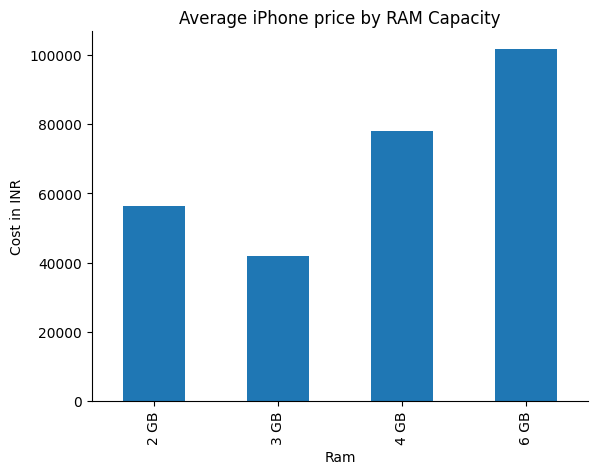

In [8]:
# bar chart for the previously calculated avg sale price 
avg_sale_price_by_RAM.plot.bar()
plt.title("Average iPhone price by RAM Capacity")
plt.ylabel("Cost in INR")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()


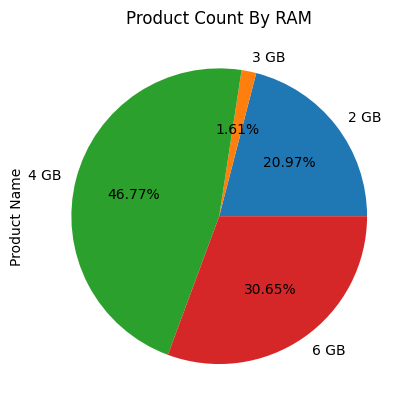

In [10]:
# Displays product market based on RAM capacity (Market Share)
groupby_RAM = df.groupby("Ram")
product_count = groupby_RAM["Product Name"].count()
product_count.plot.pie(autopct="%1.2f%%")               # %1 is for padding if necessary and .2%% is two decimal places 
plt.title("Product Count By RAM")
plt.show()


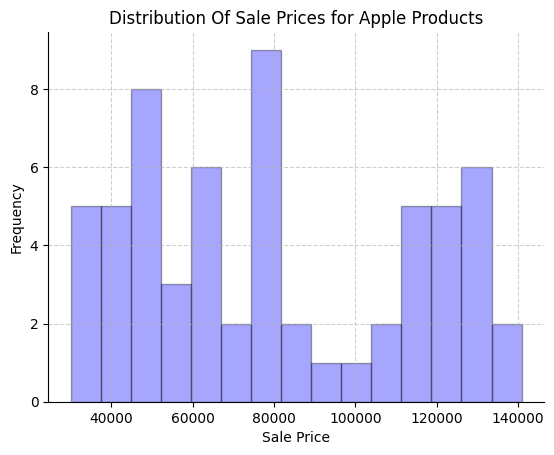

In [121]:
# histogram chart analyzing the frequency of the Sale Prices
plt.hist(df["Sale Price"], bins=15, color="blue", edgecolor='black', linewidth=1, alpha=0.35)
plt.title("Distribution Of Sale Prices for Apple Products")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(linestyle='--', alpha=0.6)
plt.show()

# Distribution shows that products under 85,000 INR are sold more

In [31]:
# Top 5 highest discounted iPhones
sorted_df = df.sort_values(by=["Discount Percentage"], ascending=False)
discounted_products = sorted_df.head()
discounted_products[["Product Name", "Sale Price", "Discount Percentage"]]
# top_5_index = discounted_products.index.values

,Product Name,Sale Price,Discount Percentage
18,"APPLE iPhone 11 Pro (Midnight Green, 64 GB)",74999,29
52,"APPLE iPhone SE (White, 64 GB)",29999,24
57,"APPLE iPhone SE (Black, 64 GB)",29999,24
55,"APPLE iPhone SE (Red, 128 GB)",34999,22
54,"APPLE iPhone SE (White, 128 GB)",34999,22


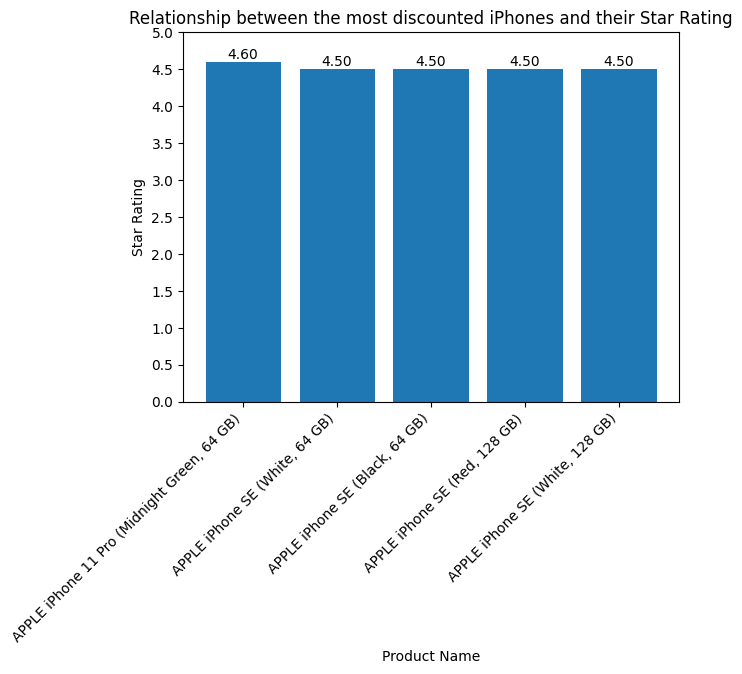

In [28]:
# Bar chart showing relevance between discounted iPhones and their ratings
product_names = discounted_products['Product Name']                         # assign product name of discounted iPhones to product_names
star_ratings = discounted_products['Star Rating']                           # assign star rating of discounted iPhones to star_ratings
bars = plt.bar(product_names, star_ratings)                                 # product names is x axis and star ratings is y axis
plt.title('Relationship between the most discounted iPhones and their Star Rating')     
plt.xlabel('Product Name')
plt.ylabel('Star Rating')
plt.xticks(rotation=45, ha='right')                                         # alignment of the product names on x axis
plt.yticks([i*0.5 for i in range(11)])                                      # y axis incremented by .5

# loop to get height of each bar, and then get starting point of the bar then get width to allow for optimal placement of the bar height 
for bar in bars: 
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
    
plt.show()

In [29]:
# Top 10 highest rated iPhones
highest_rated = df.sort_values(by=['Star Rating'], ascending=False)
new_rated = highest_rated.head(10)
new_rated[['Product Name', 'Number Of Reviews', 'Star Rating']]


,Product Name,Number Of Reviews,Star Rating
20,"APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)",101,4.7
17,"APPLE iPhone 11 Pro Max (Space Grey, 64 GB)",101,4.7
16,"APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)",101,4.7
15,"APPLE iPhone 11 Pro Max (Gold, 64 GB)",101,4.7
14,"APPLE iPhone 11 Pro Max (Gold, 256 GB)",101,4.7
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",356,4.6
29,"APPLE iPhone 12 (White, 128 GB)",180,4.6
32,"APPLE iPhone 12 Pro Max (Graphite, 128 GB)",45,4.6
35,"APPLE iPhone 12 (Black, 128 GB)",180,4.6
36,"APPLE iPhone 12 (Blue, 128 GB)",180,4.6


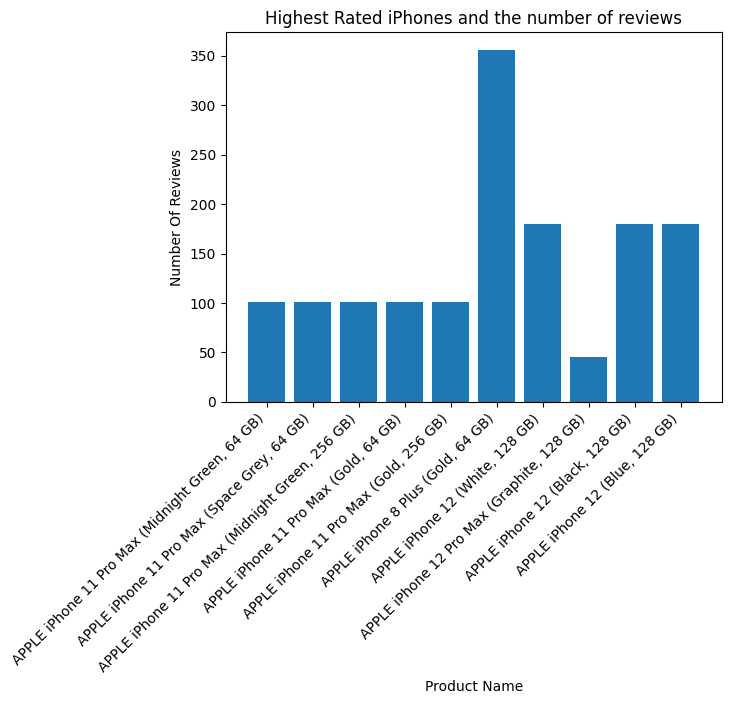

In [137]:
# Showing the relationship between the highest rated iPhones and the number of reviews. 
highest_rated_productname = new_rated["Product Name"]
highest_reviewed = new_rated["Number Of Reviews"]
bar_chart = plt.bar(highest_rated_productname, highest_reviewed)
plt.title('Highest Rated iPhones and the number of reviews')
plt.xlabel('Product Name')
plt.ylabel('Number Of Reviews')
plt.xticks(rotation=45, ha='right')

# Shows the exact value of the amount of reviews for each of the iPhones. 
#for bar in bar_chart:
#    height = bar.get_height()
#    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

# iPhone 8 plus (Gold, 64GB) is the one of the highest rated iPhones with marginally higher reviews than any of the other iPhones